<a href="https://colab.research.google.com/github/tiagosardi/optimizationMethod/blob/main/forca_bruta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Realiza todas as permutações para n valores de uma lista, recursivamente.
Esse método será utilizado para problemas pequenos e que não haverá necessidade de parar quando encontrar a solução ótima. Todas as permutações serão avaliadas.

In [1]:
!pip install mip
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sys import stdout as out
from mip import Model, xsum, minimize, BINARY, INTEGER


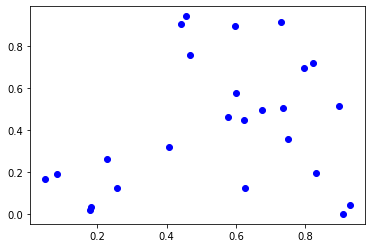

In [2]:

points = np.random.rand(25,2)


for p in points:
  plt.plot(p[0],p[1],'bo')

In [3]:
dist_matrix = [[np.linalg.norm(np.array(p1)-np.array(p2)) for p1 in points] for p2 in points]


In [4]:

n = len(points)
V = set(range(len(points)))

In [5]:
model = Model()


In [6]:
x = [[model.add_var(var_type=BINARY) for j in V] for i in V]
y = [model.add_var(var_type=INTEGER,lb=1,ub=n-1) for i in V]

In [7]:
model.objective = minimize(xsum(dist_matrix[i][j]*x[i][j] for i in V for j in V))


In [8]:
for i in V:
  model += xsum(x[i][j] for j in V - {i}) == 1 

for j in V:
  model += xsum(x[i][j] for i in V - {j}) == 1 

for (i, j) in product(V - {0}, V - {0}):
  if i!=j:
    model += y[i] - y[j] + (n+1)*x[i][j] <= n

In [9]:
model.optimize()


<OptimizationStatus.OPTIMAL: 0>

In [10]:
for row in x:
  vals = [e.x for e in row]
  print(vals)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

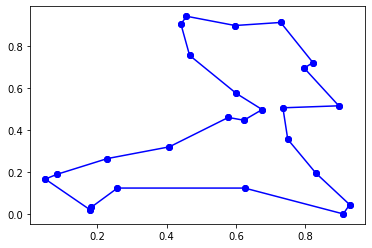

In [11]:
for i in range(len(x)):
  for j in range(len(x)):
    if x[i][j].x == 1:
      plt.plot([points[i][0],points[j][0]],[points[i][1],points[j][1]],'bo-')

In [12]:
#algoritmo de forca bruta
def brute_force(fobj,n,m,partial_solution=[], best_solution=[], best_val=np.inf, print_sol=False):
  #np.inf = infinito
  
  
  #comeca com criterio de parada
  if len(partial_solution ==n):
    fx = fobj(partial_solution) #coloquei o valor da ultima variavel em fx
    if print_sol:
      print('{} : {}'.format(partial_solution, fx))
    if fx <=best_val:
      best_solution = partial_solution
      best_val = fx
    return best_solution, best_val
  else:
    for e in set(np.arrange(m)): #transforma em conjunto a partir do set para usar operacoes de conjuntos e descontar as repeticoes, tornando o algoritmo em permutacao
      best_sol, best_val = brute_force(fobj,n,m,partial_solution + [e], 
                  best_solution, 
                  best_val,
                  print_sol)
    return best_sol, best_val

In [13]:
fobj = lambda x : np.sum(x)

In [14]:
def tsp_perm(x):
  sum = 0
  for i in range(len(x)):
    sum+= np.linalg.norm(point[x[i]] - point[x[i+1%len(x)]])

  return sum

In [ ]:
n=5
best_solution,best_val = brute_force(tsp_perm,n,n,print_sol=True)